# TME3: introduction à Numpy

> Consignes: le fichier TME3_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME3_nom1_nom2.ipynb.

## Exercice 1: 
Implémenter les exemples vu en TD. Imprimer les tableaux résultats pour vérification.

In [1]:
from PIL import Image
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

L=[]
for i in range (0,100):
    L.append(i)

tab=arange(100).reshape((10,10))
tab2=np.array(L)
tab2.reshape((10,10))

#print(tab2)

#print(tab.dtype)
tabF=np.array(tab,float)
#print(tabF)

Vec=np.zeros(100)
#print(Vec)

tab_20_30=np.zeros((20,30))
#print(tab_20_30)

tab_3dim2=np.zeros((20,30,3))

#print(tab_3dim2)

print(np.mean(tab))

49.5


## Exercice 2: Numpy et les images

### 2.1 Normalisation
Normaliser l'image <tt>img/seiche.png</tt>. Indication: utiliser les méthodes <tt>min()</tt> et <tt>max()</tt> de la classe <tt>ndarray</tt>. Afficher l'image PIL <tt>seiche.png</tt> puis le tableau numpy normalisé. Ps: si l'image numpy apparait colorée, utiliser la fonction gray() qui fixe la palette de couleurs d'<tt>imshow()</tt> en niveaux de gris.

27
172


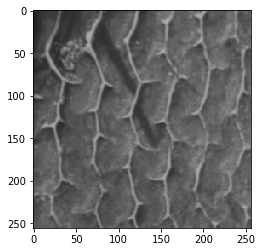

[[ 37  40  42 ...  87  91  95]
 [ 34  39  43 ...  90  90  93]
 [ 32  37  40 ...  89  88  92]
 ...
 [100  95  91 ...  85  82  80]
 [ 92  90  91 ...  89  85  74]
 [ 87  87  88 ...  87  87  86]]


In [2]:
from PIL import Image
from pylab import *

img=Image.open('img/seiche.png')

print(np.min(img))
print(np.max(img))

imshow(img)
show()
tab=np.array(img)
print(tab)




### 2.2 Visualisation PIL et Numpy
Lire l'image <tt>img/CT-scan.png</tt> (une coupe d'une acquisition d'un scanner X d'un corps humain) avec PIL et sa classe <tt>Image</tt>. Imprimer les extremas de l'image et l'image PIL. Transformer-là en tableau Numpy. A nouveau afficher ce tableau sous forme d'image. Que constatez-vous ?

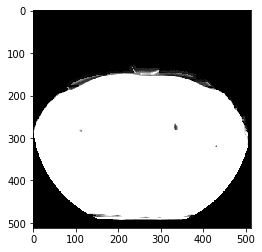

(0, 2244)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


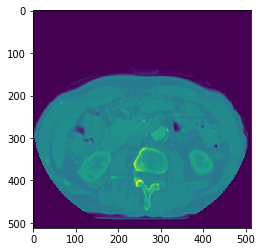

In [50]:
from PIL import Image
from pylab import *

img=Image.open('img/CT-scan.png')
imshow(img)
show()
print(img.getextrema())
tab=np.array(img)
print(tab)
imshow(tab)
show()

### 2.3 Seuillage
Prendre le tableau numpy de la question précédente. Appliquer un seuillage haut au seuil 255. 
Remarque: cette opération se fait une instruction Python. Afficher le résultat sous forme d'image et comparer avec l'image PIL affichée à la question précédente. Qu'en déduisez vous du comportement de imshow() sur les images PIL ?

(0, 2244)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


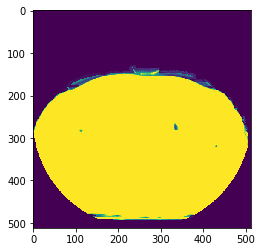

In [3]:
from PIL import Image
from pylab import *

img=Image.open('img/CT-scan.png')
print(img.getextrema())
tab=np.array(img)
tab[tab > 255]=255

print(tab)
plt.imshow(tab)
plt.show()

### 2.4 Seuillage - suite
Sur la même image, appliquer un seuillage à 1000 et commenter la visualisation de l'image seuillée. Essayer d'autres valeurs de seuils pour différentier certains organes.


(0, 2244)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


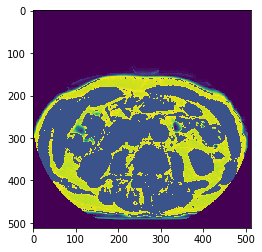

In [64]:
from PIL import Image
from pylab import *

img=Image.open('img/CT-scan.png')
print(img.getextrema())
tab=np.array(img)
tab[tab > 1000]=255

print(tab)
plt.imshow(tab)
plt.show()

### 2.4 Damier
Comment fabriquer un image qui représente un damier (alternance de 6 cases blanches et 6 cases noires en ligne et en colonne), chaque case étant de taille 20 par 20. On pourra utiliser les fonctions <tt>hstack()</tt>, <tt>vstack()</tt> et <tt>tile()</tt>.

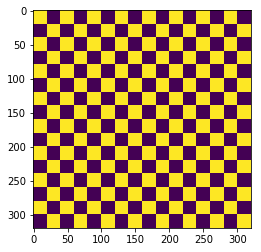

In [5]:
t1=zeros((20,20))
t1[t1 == 0]= 255
t1=t1.astype(int)  #type
t2=zeros((20,20))

ligne=5
colonne=5

tab=hstack((t1,t2))
ligneT1=tile(tab,8)
tab2=hstack((t2,t1))
ligneT2=tile(tab2,8)
tab=vstack((ligneT1,ligneT2))

for i in range(3):
    tab=vstack((tab,tab))
imshow(tab)
show()

## Exercice 3: Manipulation et parcours de tableaux
### 3.1 Permutation de colonnes
Écrire un code Python qui créé un tableau <tt>A</tt> initialisé à des valeurs quelconque, ou bien une image lue sur le disque, construit un tableau <tt>B</tt> de même taille qui contient en première colonne la dernière colonne de <tt>A</tt>, et pour ses colonnes restantes, les premières colonnes de <tt>A</tt>. 


In [101]:
p=10;n=10
A = array([[(i+1)*(j+1) for j in range(n)] for i in range(p)])
B = array([[(i+1)*(j+1) for j in range(n)] for i in range(p)])

B[:, 0]=A[:, n-1]

B[:, 1:]=A[:, 0:1]
print(A)
print(B)



[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[[ 10   1   1   1   1   1   1   1   1   1]
 [ 20   2   2   2   2   2   2   2   2   2]
 [ 30   3   3   3   3   3   3   3   3   3]
 [ 40   4   4   4   4   4   4   4   4   4]
 [ 50   5   5   5   5   5   5   5   5   5]
 [ 60   6   6   6   6   6   6   6   6   6]
 [ 70   7   7   7   7   7   7   7   7   7]
 [ 80   8   8   8   8   8   8   8   8   8]
 [ 90   9   9   9   9   9   9   9   9   9]
 [100  10  10  10  10  10  10  10  10  10]]


### 3.2 Duplication de lignes et colonnes
Écrire un code Python qui prend le même tableau <tt>A</tt>, créé un tableau <tt>A2</tt> ayant 2 lignes et deux colonnes de plus que <tt>A</tt> et telque :
 - <tt>A2</tt> privé de ses premières et dernières lignes et colonnes doit valoir <tt>A</tt>. 
 - Les bords de <tt>A2</tt> doivent correspondre aux bords de <tt>A</tt>. Les valeurs aux coins de A2 ne devraient pas vous poser de problème !


In [109]:

A = array([[(i+1)*(j+1) for j in range(n)] for i in range(p)])
A2= array([[(i+1)*(j+1) for j in range(n+2)] for i in range(p+2)])
A2[1:p+1,1:p+1]=A
print(A)
print(A2)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[[  1   2   3   4   5   6   7   8   9  10  11  12]
 [  2   1   2   3   4   5   6   7   8   9  10  24]
 [  3   2   4   6   8  10  12  14  16  18  20  36]
 [  4   3   6   9  12  15  18  21  24  27  30  48]
 [  5   4   8  12  16  20  24  28  32  36  40  60]
 [  6   5  10  15  20  25  30  35  40  45  50  72]
 [  7   6  12  18  24  30  36  42  48  54  60  84]
 [  8   7  14  21  28  35  42  49  56  63  70  96]
 [  9   8  16  24  32  40  48  56  64  72  80 108]
 [ 10   9  18  27  36  45  54  63  72  81  90 120]
 [ 11  10  20  30  40  50  60  70  80  90 100 132]
 [ 12  2

### 3.3 Temps de calcul
Reprendre l'exercice 2 du TME2 en utilisant Numpy: calculer les extremas d'un tableau numpy (de grande taille, par exemple l'image <tt>../TME2/img/genies-math.jpg</tt> convertie en niveaux de gris), en parcourant par indice les valeurs du tableau. Puis utiliser les méthodes <tt>min()</tt> et <tt>max()</tt>. Chronométrer les temps grâce aux fonctions <tt>tic()</tt> et <tt>tac()</tt>. Discuter ces temps.

In [123]:
from time import process_time
from pylab import *
from PIL import Image
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

###

def extrema():
    img=Image.open('img/genies-math.jpg')
    img=img.convert('L')
    A=array(img)
    min=A[0,0]
    max=A[0,0]
    for i in np.nditer(A):
            if min>i:
                min=i
            if max<i:
                max=i
    print("le min est ",min)
    print("le max est", max)
print ("tech 1")
tic()
extrema()
tac()
print ("tech 2")
img=Image.open('img/genies-math.jpg')
img=img.convert('L')
A=array(img)
tic()
print(np.min(A))
print(np.max(A))
tac()

#on en debuit que le min max de numpy est extrement plus rapide 

tech 1
le min est  0
le max est 255
14.65625
tech 2
0
255
0.140625
